In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.shape

(150, 6)

In [10]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
X = df.drop(['Species','Id'],axis = 1)
y = df['Species']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

In [14]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(133.92000000000002, 195.696, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [39, 38, 43]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 4.95\ngini = 0.498\nsamples = 81\nvalue = [0, 38, 43]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 1.65\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(200.88000000000002, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

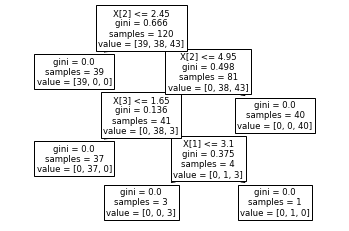

In [15]:
tree.plot_tree(model)

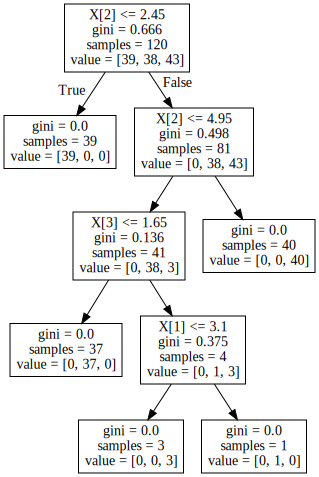

In [16]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris.csv")
graph

In [17]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [18]:
param_dist = {"max_depth": [3, None],
              "max_features":[0.1,2,3,4],
              "min_samples_leaf":[1], 
              "criterion": ["gini", "entropy"]}


In [19]:
clf = RandomizedSearchCV(model,param_dist,random_state = 21)
clf.fit(X_train,y_train)

C:\Users\91782\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\91782\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='b

In [20]:
y_pred = clf.predict(X_test)

In [21]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
92,5.8,2.6,4.0,1.2
44,5.1,3.8,1.9,0.4
7,5.0,3.4,1.5,0.2
21,5.1,3.7,1.5,0.4
95,5.7,3.0,4.2,1.2
75,6.6,3.0,4.4,1.4
20,5.4,3.4,1.7,0.2
121,5.6,2.8,4.9,2.0
26,5.0,3.4,1.6,0.4
19,5.1,3.8,1.5,0.3


In [22]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
y_ = np.array([6.7,3.3,5.7,2.1]).reshape(1,-1)

In [24]:
clf.predict(y_)

array(['Iris-virginica'], dtype=object)